# `Breast Cancer Analysis`

## **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

import warnings 
warnings.filterwarnings("ignore")

## **Load Dataset**

In [3]:
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  

x1 = breast_cancer_wisconsin_original.data.features 
y1 = breast_cancer_wisconsin_original.data.targets 

In [18]:
breast_cancer_wisconsin_original

{'data': {'ids':      Sample_code_number
  0               1000025
  1               1002945
  2               1015425
  3               1016277
  4               1017023
  ..                  ...
  694              776715
  695              841769
  696              888820
  697              897471
  698              897471
  
  [699 rows x 1 columns],
  'features':      Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
  0                  5                        1                         1   
  1                  5                        4                         4   
  2                  3                        1                         1   
  3                  6                        8                         8   
  4                  4                        1                         1   
  ..               ...                      ...                       ...   
  694                3                        1                         1   
  695           

In [5]:
df=pd.concat([x1,y1],axis=1)
df.head(3)

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2


In [6]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [7]:
df.nunique()

Clump_thickness                10
Uniformity_of_cell_size        10
Uniformity_of_cell_shape       10
Marginal_adhesion              10
Single_epithelial_cell_size    10
Bare_nuclei                    10
Bland_chromatin                10
Normal_nucleoli                10
Mitoses                         9
Class                           2
dtype: int64

In [8]:
df.Bare_nuclei.unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

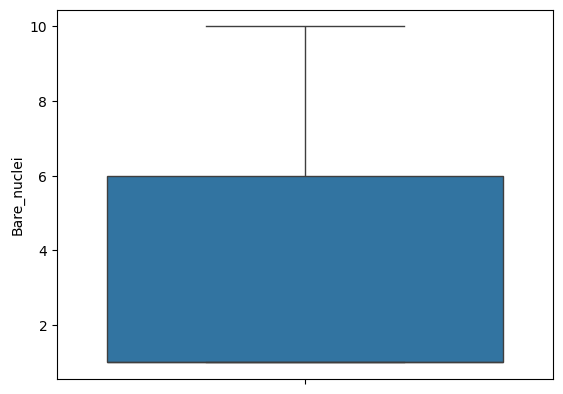

In [9]:
sns.boxplot(data=df,y="Bare_nuclei")
plt.show()

In [10]:
df.Bare_nuclei = df.Bare_nuclei.fillna(int(df.Bare_nuclei.mean()))

In [11]:
df.Bare_nuclei.unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7.,  5.,  8.,  6.])

In [12]:
df.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.532189,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.602774,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [13]:
df.columns

Index(['Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [15]:
df.dtypes

Clump_thickness                  int64
Uniformity_of_cell_size          int64
Uniformity_of_cell_shape         int64
Marginal_adhesion                int64
Single_epithelial_cell_size      int64
Bare_nuclei                    float64
Bland_chromatin                  int64
Normal_nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [16]:
df.Bare_nuclei=df.Bare_nuclei.astype(int)
df.dtypes

Clump_thickness                int64
Uniformity_of_cell_size        int64
Uniformity_of_cell_shape       int64
Marginal_adhesion              int64
Single_epithelial_cell_size    int64
Bare_nuclei                    int64
Bland_chromatin                int64
Normal_nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [17]:
df.Class.unique()

array([2, 4])

2 means  benign

4 means  malignant

## **Visualization**

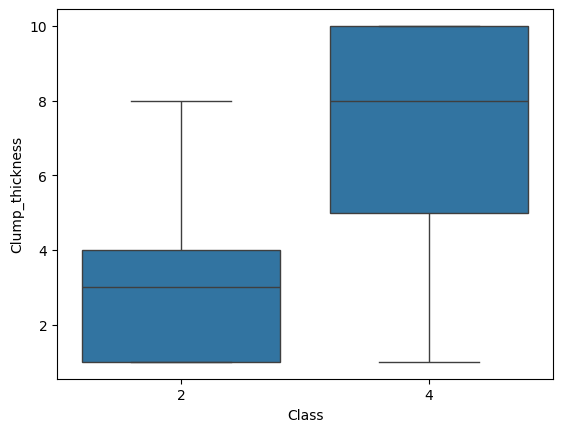

In [22]:
sns.boxplot(x="Class", y="Clump_thickness", data=df)
plt.show()


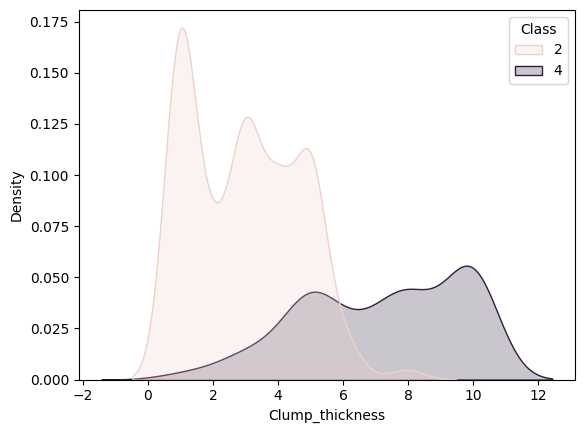

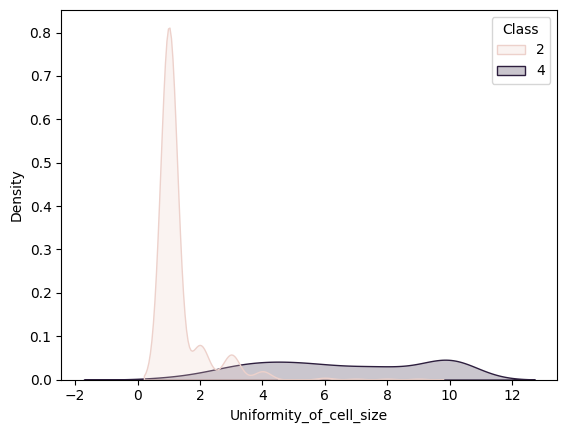

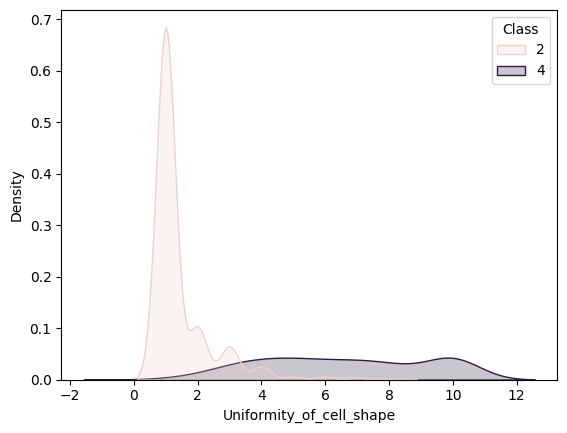

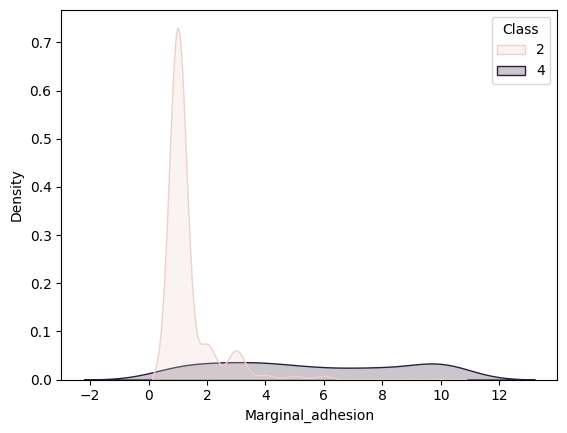

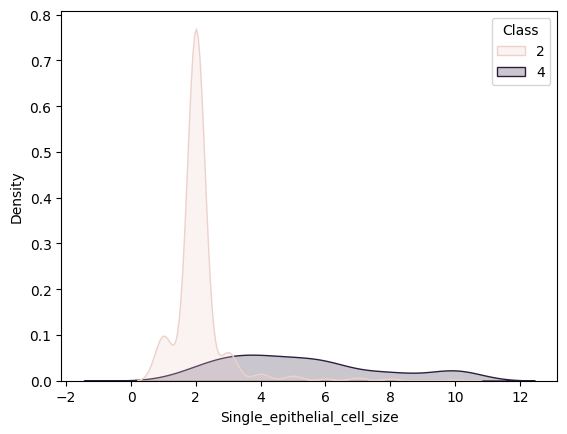

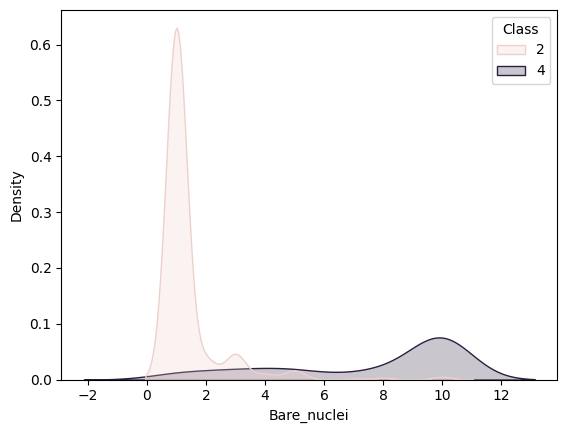

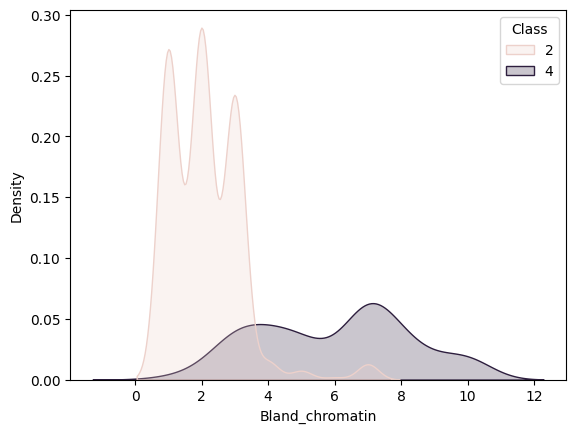

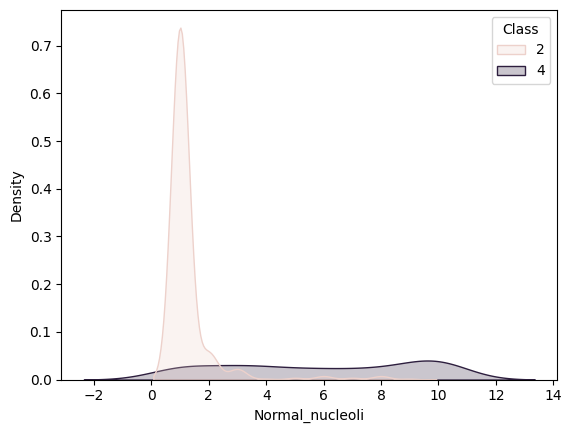

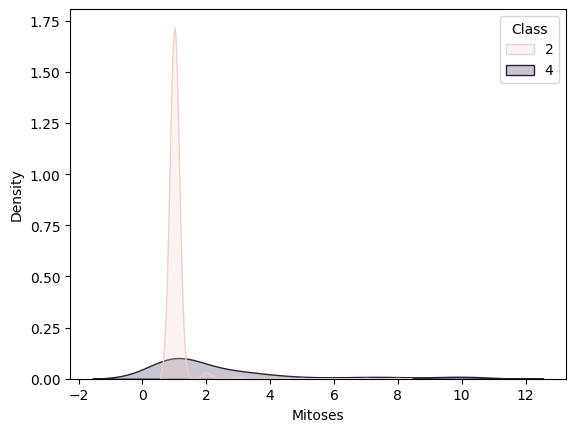

In [ ]:
for col in df.columns[:-1]:
    plt.figure()
    sns.kdeplot(data=df, x=col, hue="Class", fill=True)
    plt.show()


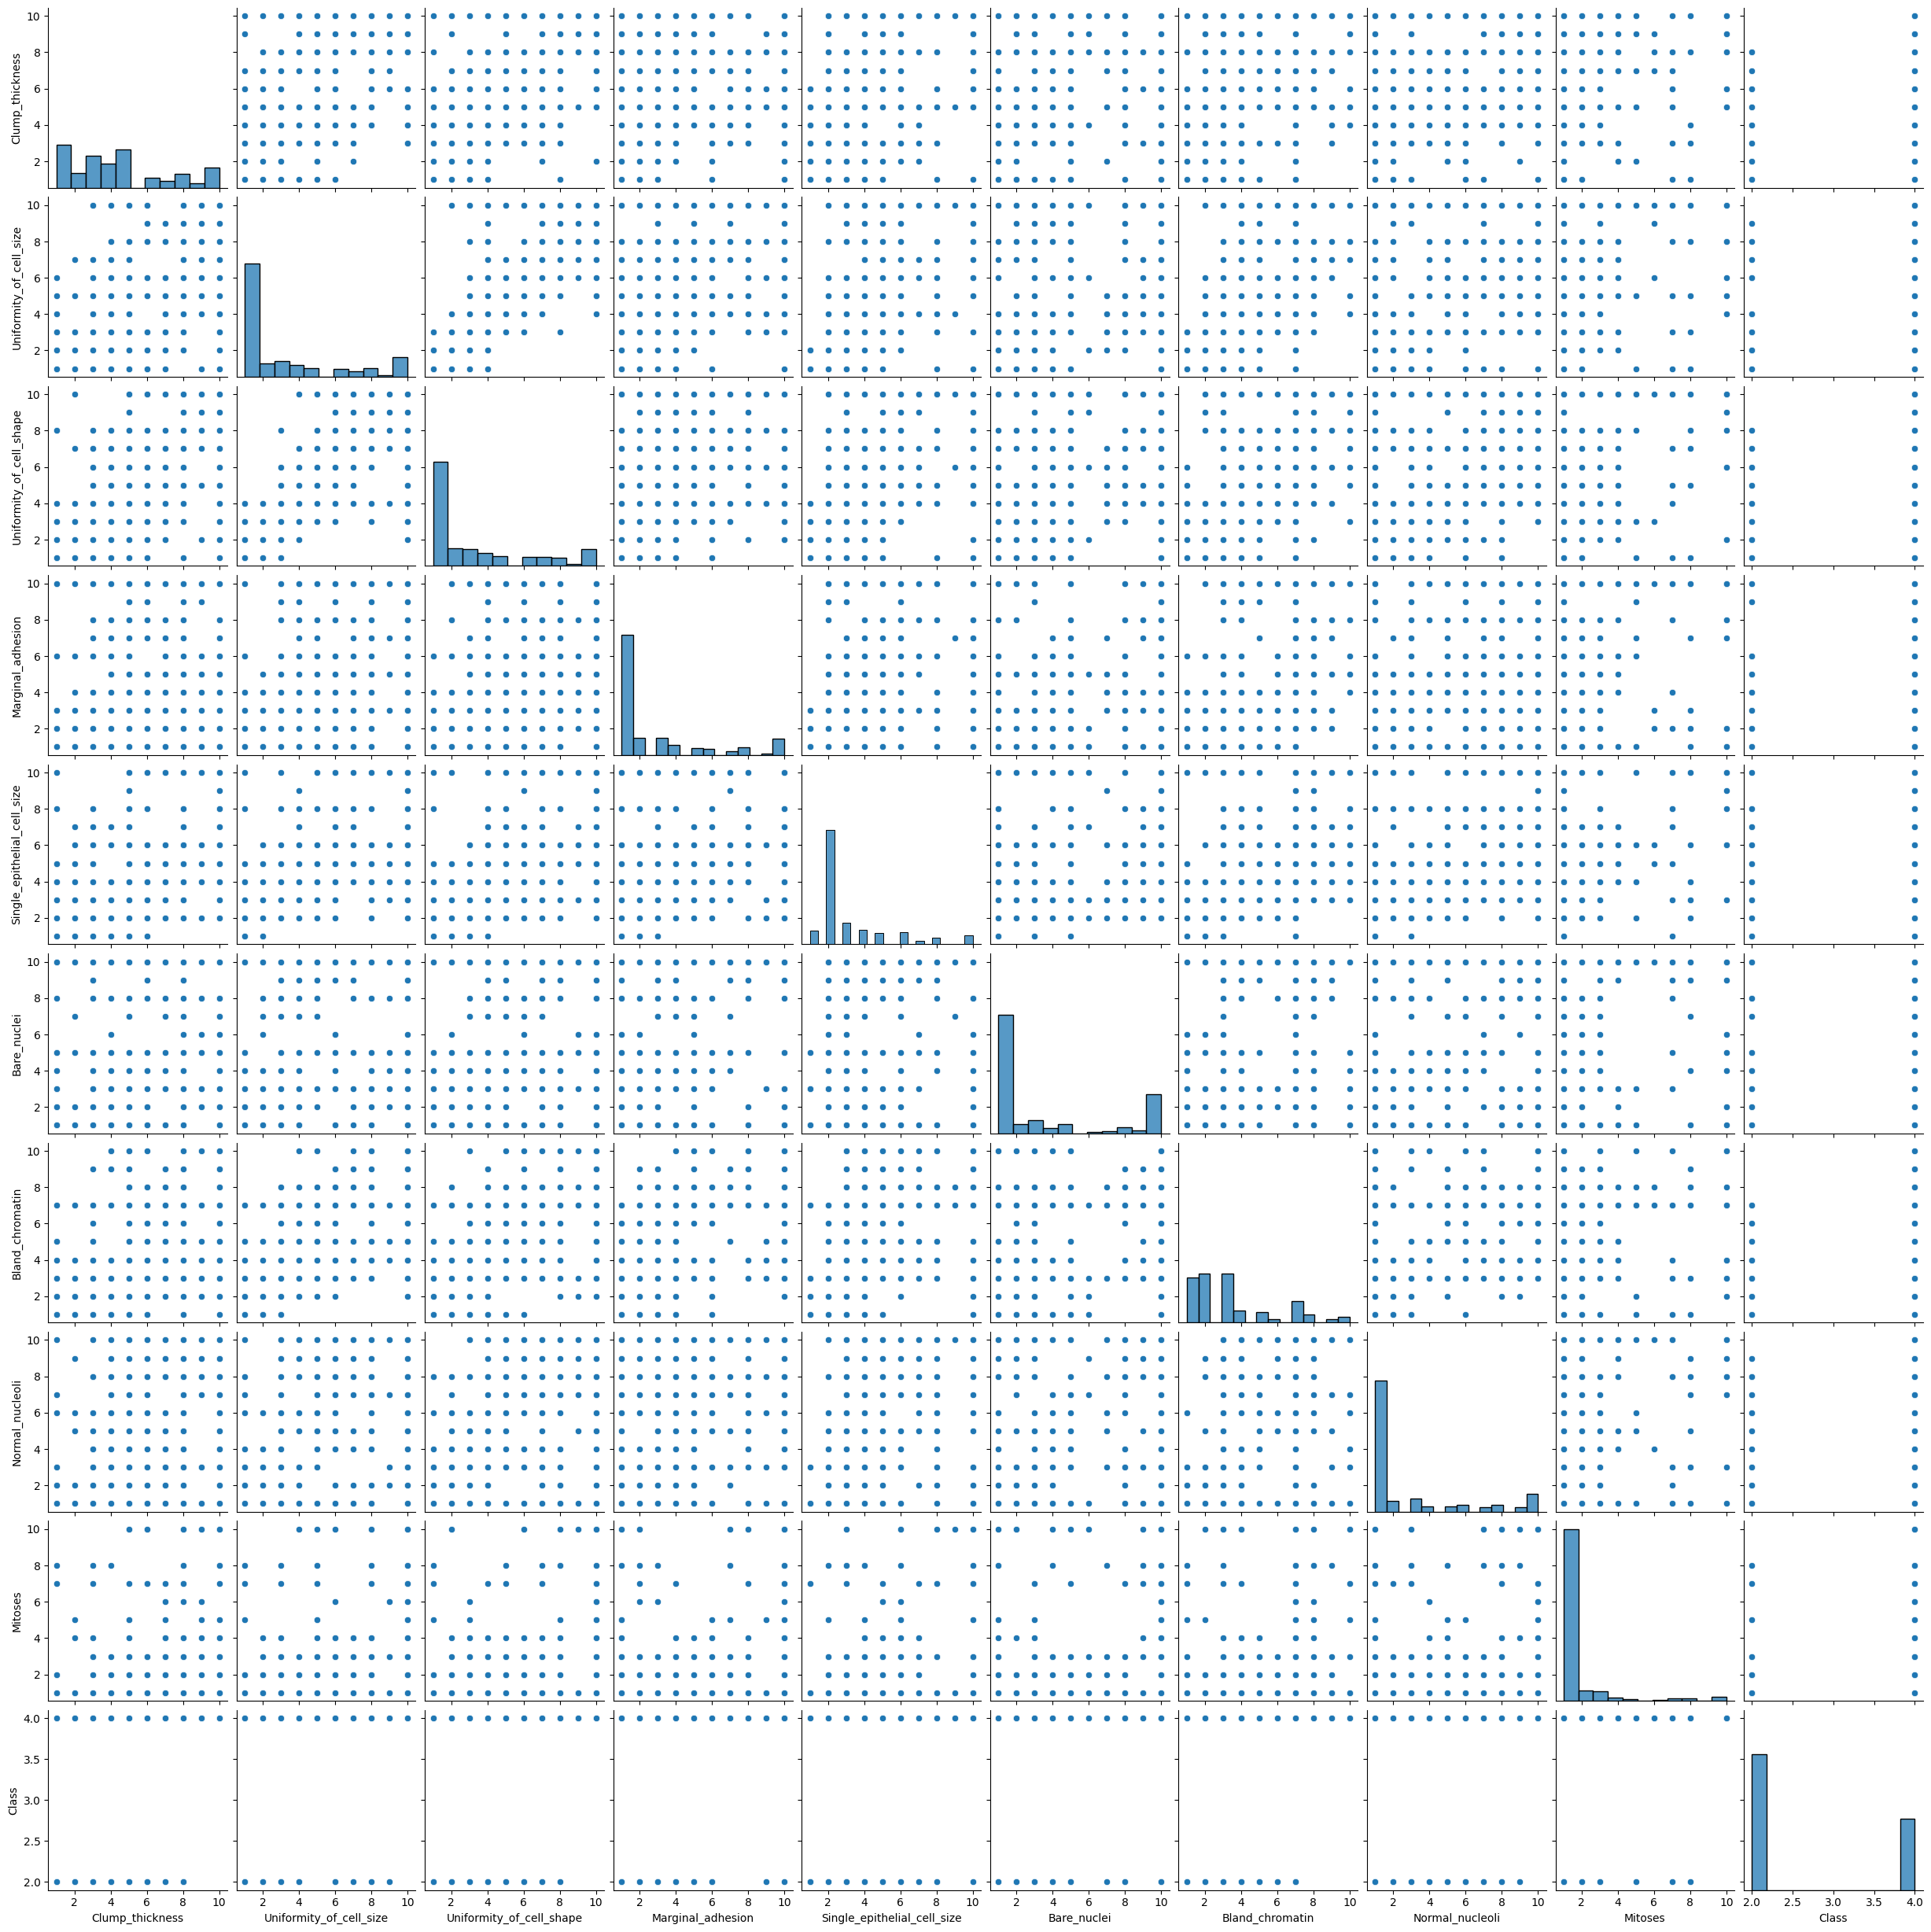

In [19]:
sns.pairplot(data=df)
plt.show()

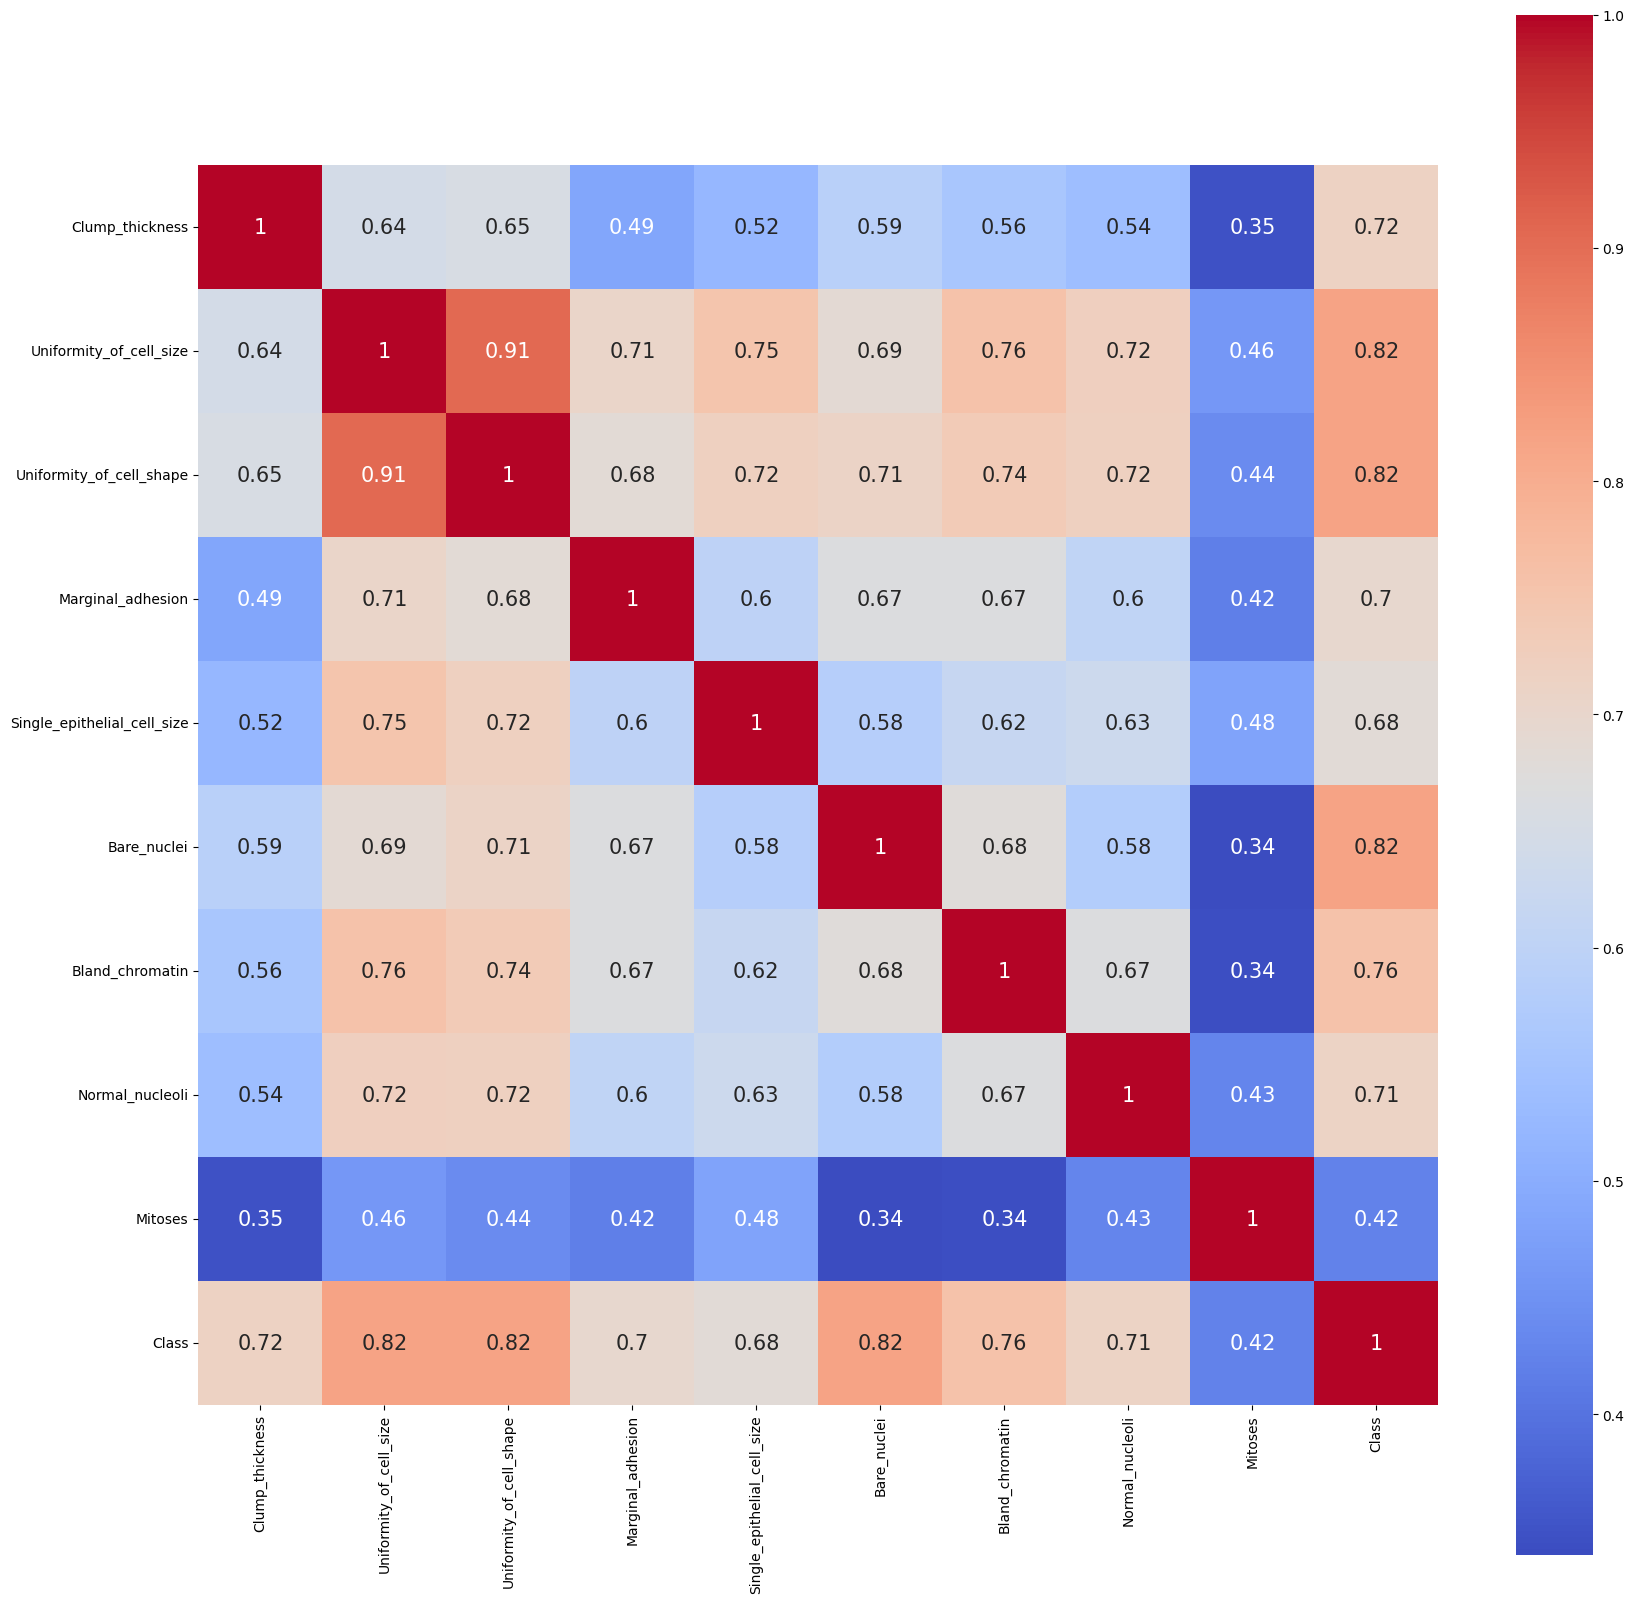

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,square=True,annot_kws={'size':15},cmap='coolwarm')
plt.show()

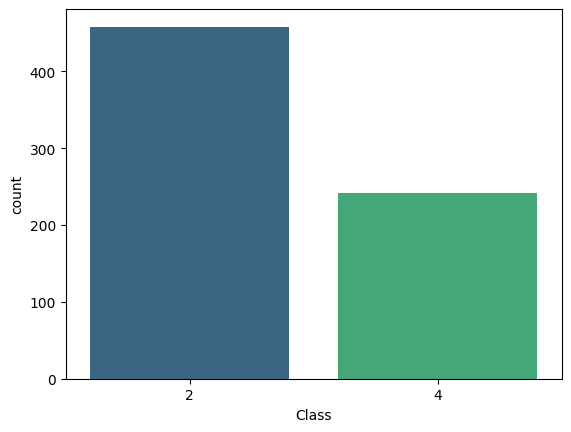

In [21]:
sns.countplot(data=df,x="Class",palette="viridis")
plt.show()

## `Conclusion`

Benign tumors generally show low feature values, while malignant tumors tend to have high values. Features like clump thickness and cell size/shape are the strongest indicators, which makes this dataset highly useful for classification.


**The most informative features that separate the classes are Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Bare Nuclei, and Normal Nucleoli. These features are highly effective for machine learning prediction and play a crucial role in building accurate classification models.**